Question 1: 

RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source – Cygnus - A (RA 19h59m28.3566s, Dec +40° 44′ 02.096″)

Answer 1:

RA and Dec of Cygnus A change slightly today due to Earth’s axial precession, which causes the celestial coordinate system to vary with time. Since RA and Dec are defined with respect to a standard epoch (J2000 in this case), this shift can be computed using Astropy as shown below

In [ ]:
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time
import astropy.units as u

cygA_old = SkyCoord(    
    ra="19h59m28.3566s",
    dec="+40d44m02.096s",
    frame=FK5(equinox=Time("J2000"))
)

today = Time.now()
cygA_today = cygA_old.transform_to(FK5(equinox=today))
x = cygA_today.ra.to_string(unit=u.hour, sep=":", precision=2)
y = cygA_today.dec.to_string(unit=u.deg, sep=":", alwayssign=True, precision=2)

print(f"RA = {x}, Dec = {y}")

RA = 20:00:22.46, Dec = +40:48:22.95


Question 2:

What will be this source’s azimuth and elevation when observing from IIT Kanpur?

Answer 2:

As we know that the alt-az coordinate system is depends on two factors the location of observer and secondly the time of observation. The azimuth and altitude of Cygnus A from IIT Kanpur are obtained by transforming its current-epoch RA–Dec coordinates (which we have derived previously) into the AltAz frame using the observer’s location and observation time.

The latitude, longitude, and height values correspond to the known geographic coordinates of IIT Kanpur, obtained through online resources.

In [4]:
from astropy.coordinates import EarthLocation, AltAz

iitk = EarthLocation(
    lat=26.51 * u.deg,
    lon=80.23 * u.deg,
    height=142 * u.m
)

obs_time = Time.now()
altaz_frame = AltAz(location=iitk, obstime=obs_time)
cygA_altaz = cygA_today.transform_to(altaz_frame)

az = cygA_altaz.az.degree
alt = cygA_altaz.alt.degree

print(f"Azimuth = {az}, Altitude = {alt}")


Azimuth = 48.503640728937675, Altitude = 8.67964974787384


At the time of observation, Cygnus A appears at an azimuth of about 48.5° and an altitude of about 8.7° when observed from IIT Kanpur.

Question 3:

Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

A polar plot can be used to visualize the path of Cygnus A in the sky as observed from IIT Kanpur over a 24-hour period (which we are dividing into 200 parts).
Azimuth is plotted as the angular coordinate, while the radial coordinate is defined as r = 90° − altitude, 
so that the zenith lies at the center (which means, alt = 90 and r= 0) and the horizon corresponds to a radius of 90° (so, alt = 0 and r = 90).

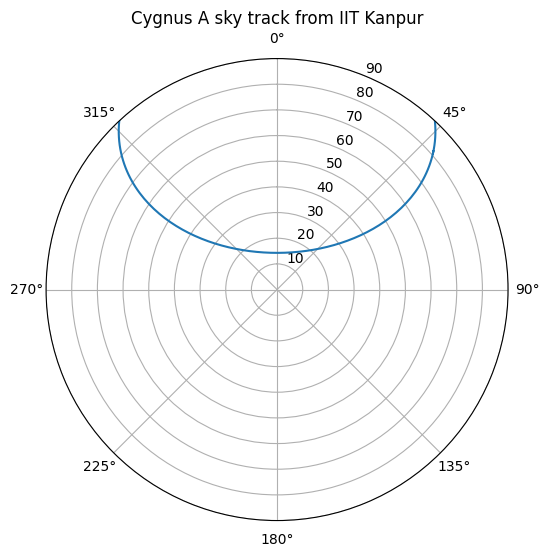

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

times = obs_time + np.linspace(0, 24, 200) * u.hour

# We are changing the frame for multiple times throughout the day, and the times array created above divides the 24 hours into 200 intervals which will be approximately 7.2-7.3 minutes.
altaz = cygA_today.transform_to(
    AltAz(location=iitk, obstime=times)
)

#here we are extracting the azimuth and altitude values as polar coordinates
az = altaz.az.radian
r = 90 - altaz.alt.degree

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(az, r)
ax.set_theta_zero_location('N')   # this is necessary to define North at top
ax.set_theta_direction(-1)        # we know that Azimuth increases clockwise
ax.set_rlim(0, 90)                # if north is towards top then we have to define Zenith to horizon
ax.set_title("Cygnus A sky track from IIT Kanpur")
plt.show()


Question 4:

Plot how Sun’s RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

The RA and Dec of the Sun vary a lot throughout the year due to Earth’s orbital motion, causing the Sun to trace the ecliptic which we discussed in class. On the other hand, celestial sources such as Cygnus A which are very distant to us show negligible variation in RA and Dec over a year, and the only small changes which arise are from the slow precession of Earth’s coordinate system which is mentioned and explained in the answer to Question 1.

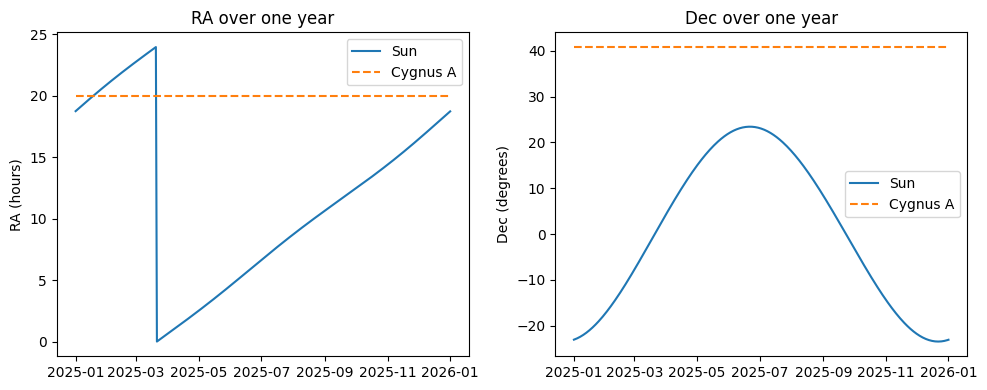

In [ ]:
from astropy.coordinates import get_sun

# This basically generates an array of times over one year starting from Jan 1, 2025 with one entry for each day
days = Time("2025-01-01") + np.linspace(0, 365, 366) * u.day

sun = get_sun(days)

# Cygnus A these will be constant over the year as mentioned above that its RA and Dec do not change significantly over short time scales
ra = np.full(len(days), cygA_today.ra.hour)
dec = np.full(len(days), cygA_today.dec.degree)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(days.datetime, sun.ra.hour, label="Sun")
plt.plot(days.datetime, ra, "--", label="Cygnus A")
plt.ylabel("RA (hours)")
plt.title("RA over one year")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(days.datetime, sun.dec.degree, label="Sun")
plt.plot(days.datetime, dec, "--", label="Cygnus A")
plt.ylabel("Dec (degrees)")
plt.title("Dec over one year")
plt.legend()

plt.tight_layout()
plt.show()
